<a href="https://www.kaggle.com/code/mohammedsalah958/heart-failure-prediction?scriptVersionId=134978181" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-failure-prediction/heart.csv


In [2]:
df=pd.read_csv('/kaggle/input/heart-failure-prediction/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


**there is no nan value**

In [4]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


-I Assume that there is outliers in Cholesterol 

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

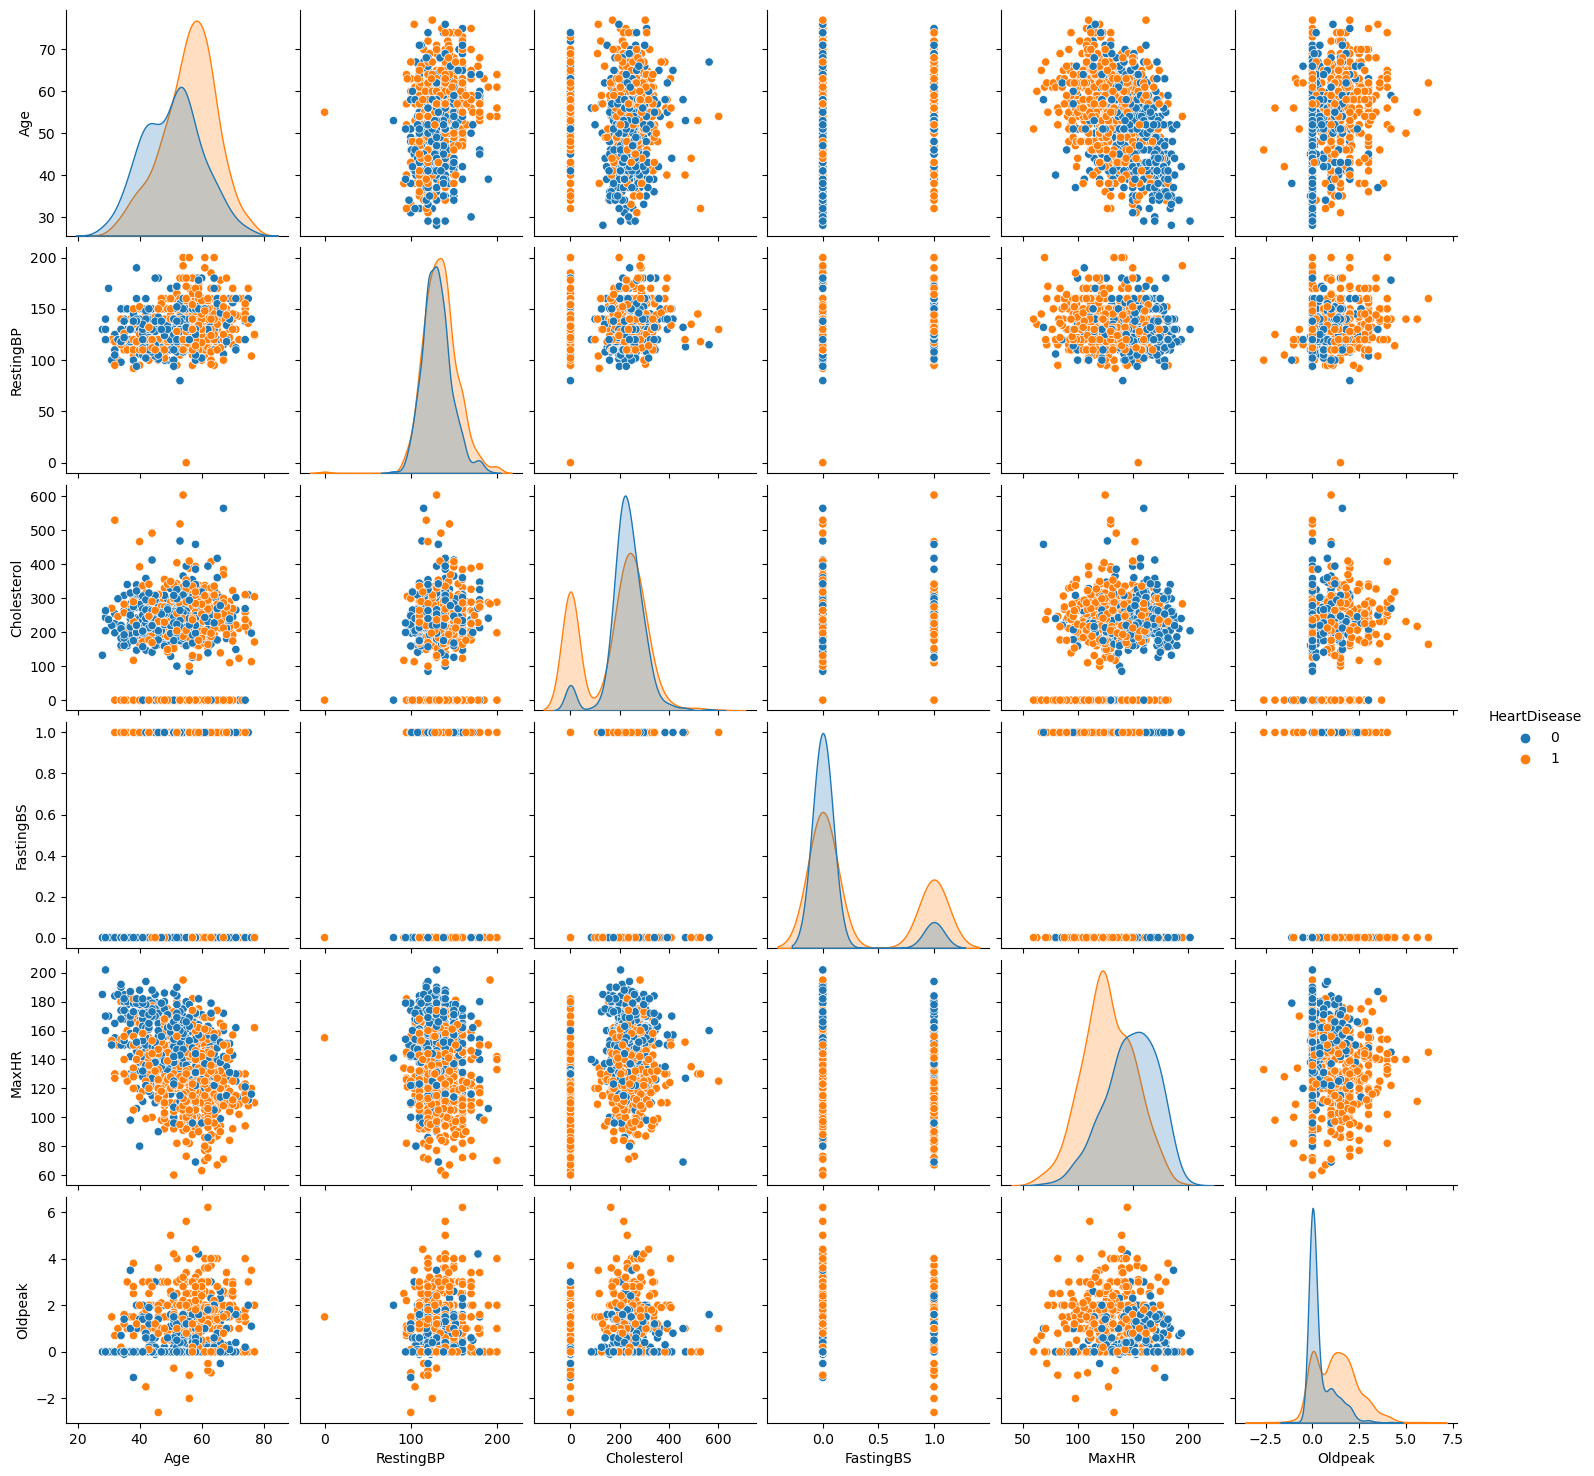

In [6]:
sns.pairplot(df,hue='HeartDisease')

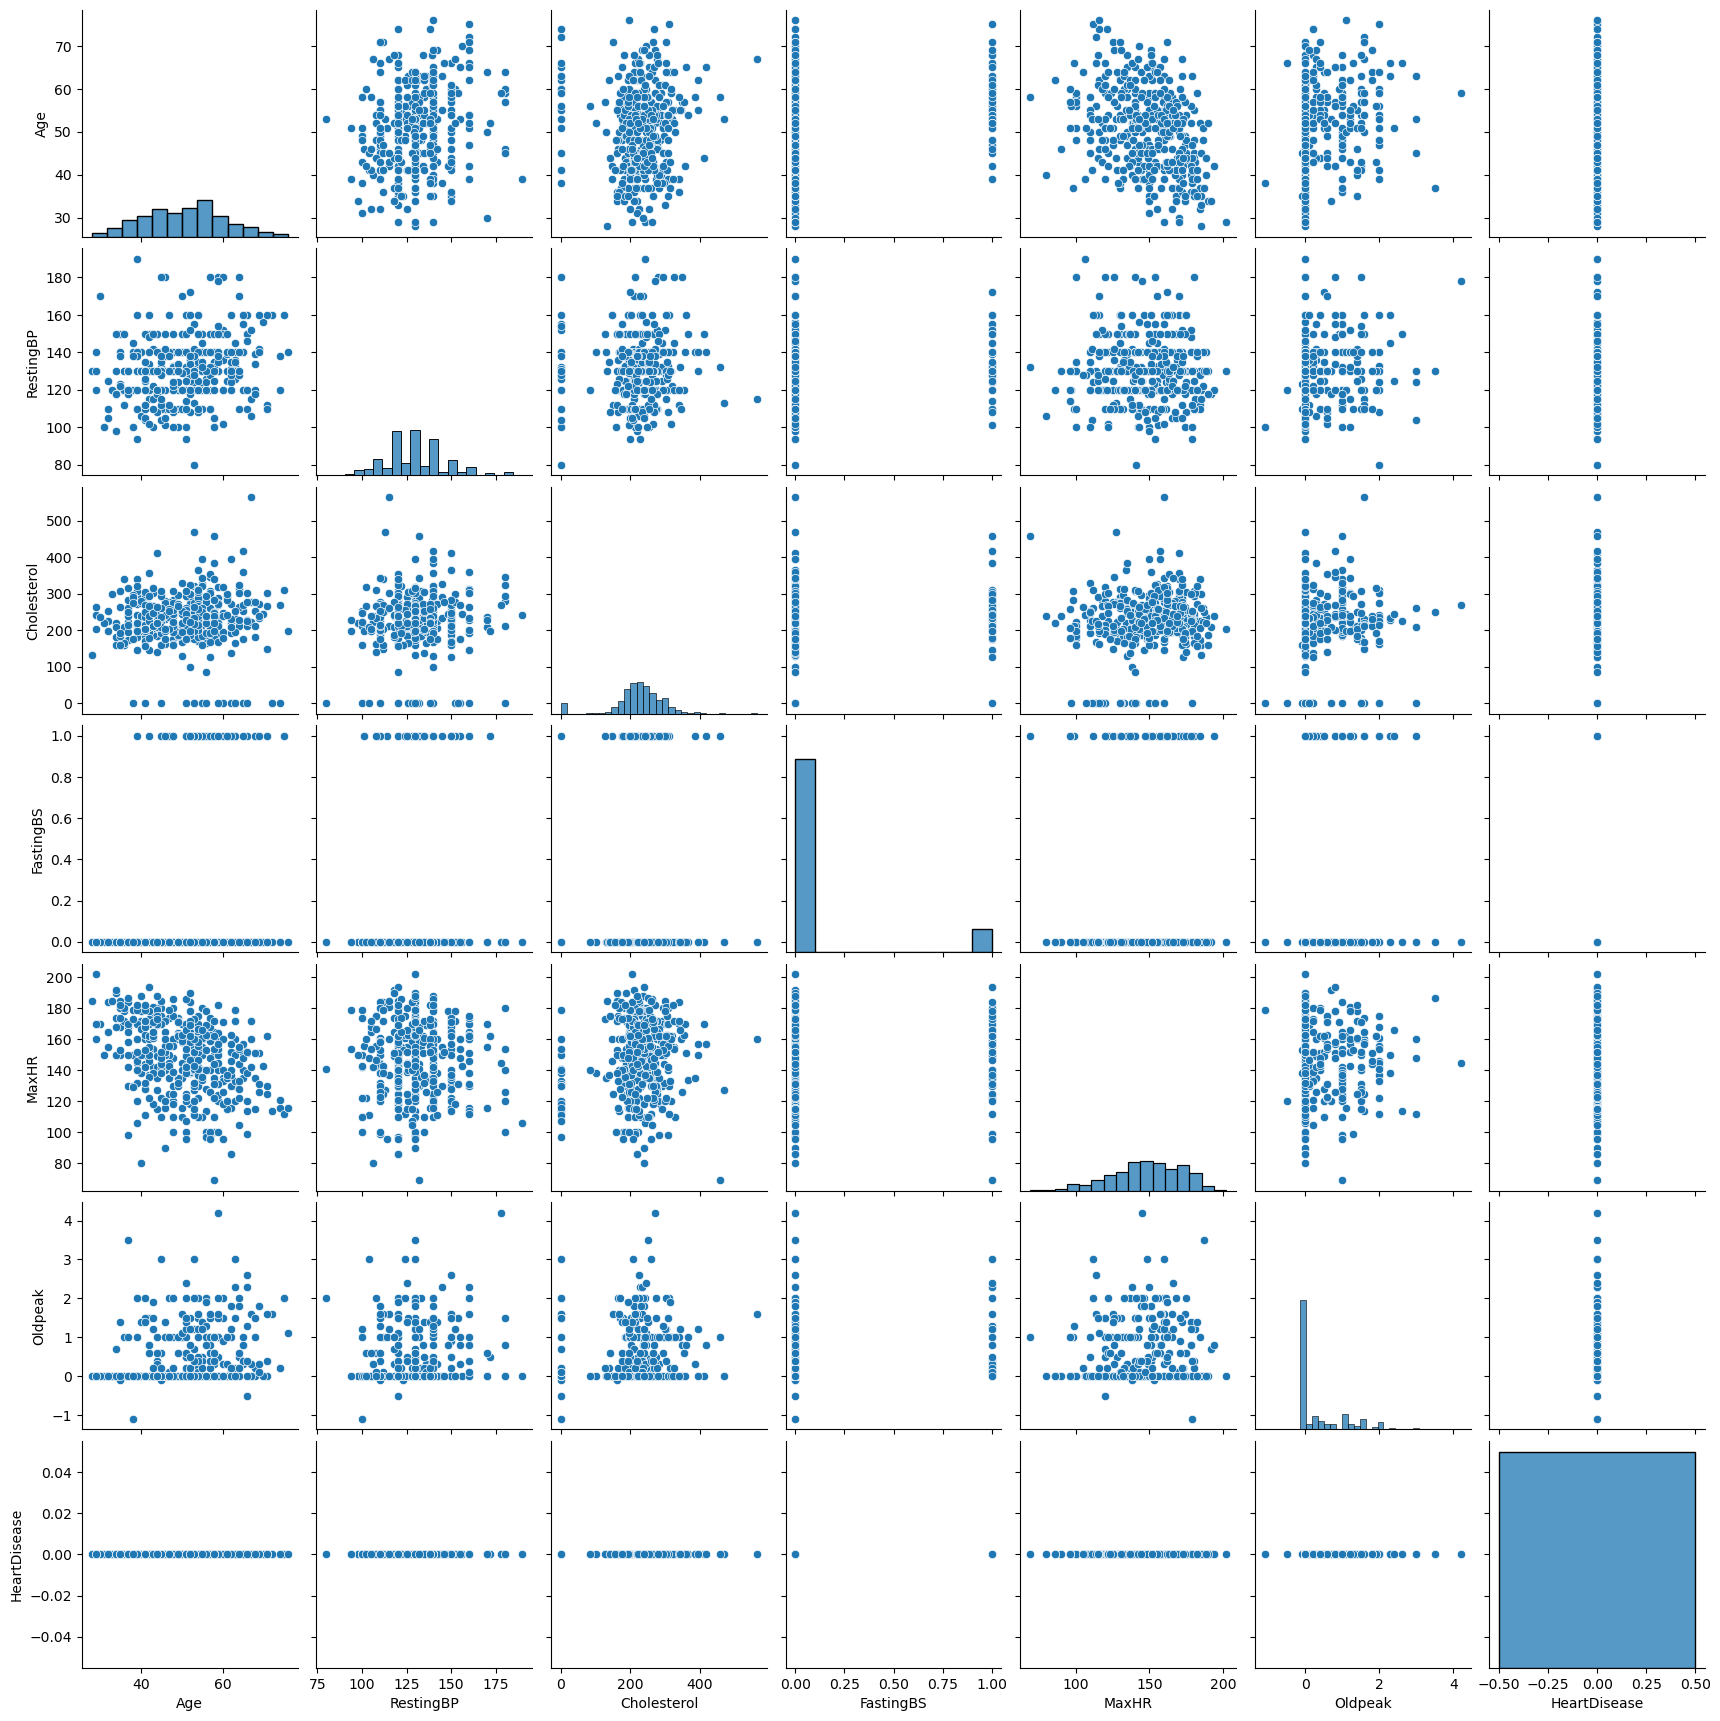

In [7]:
sns.pairplot(df[df['HeartDisease']==0])

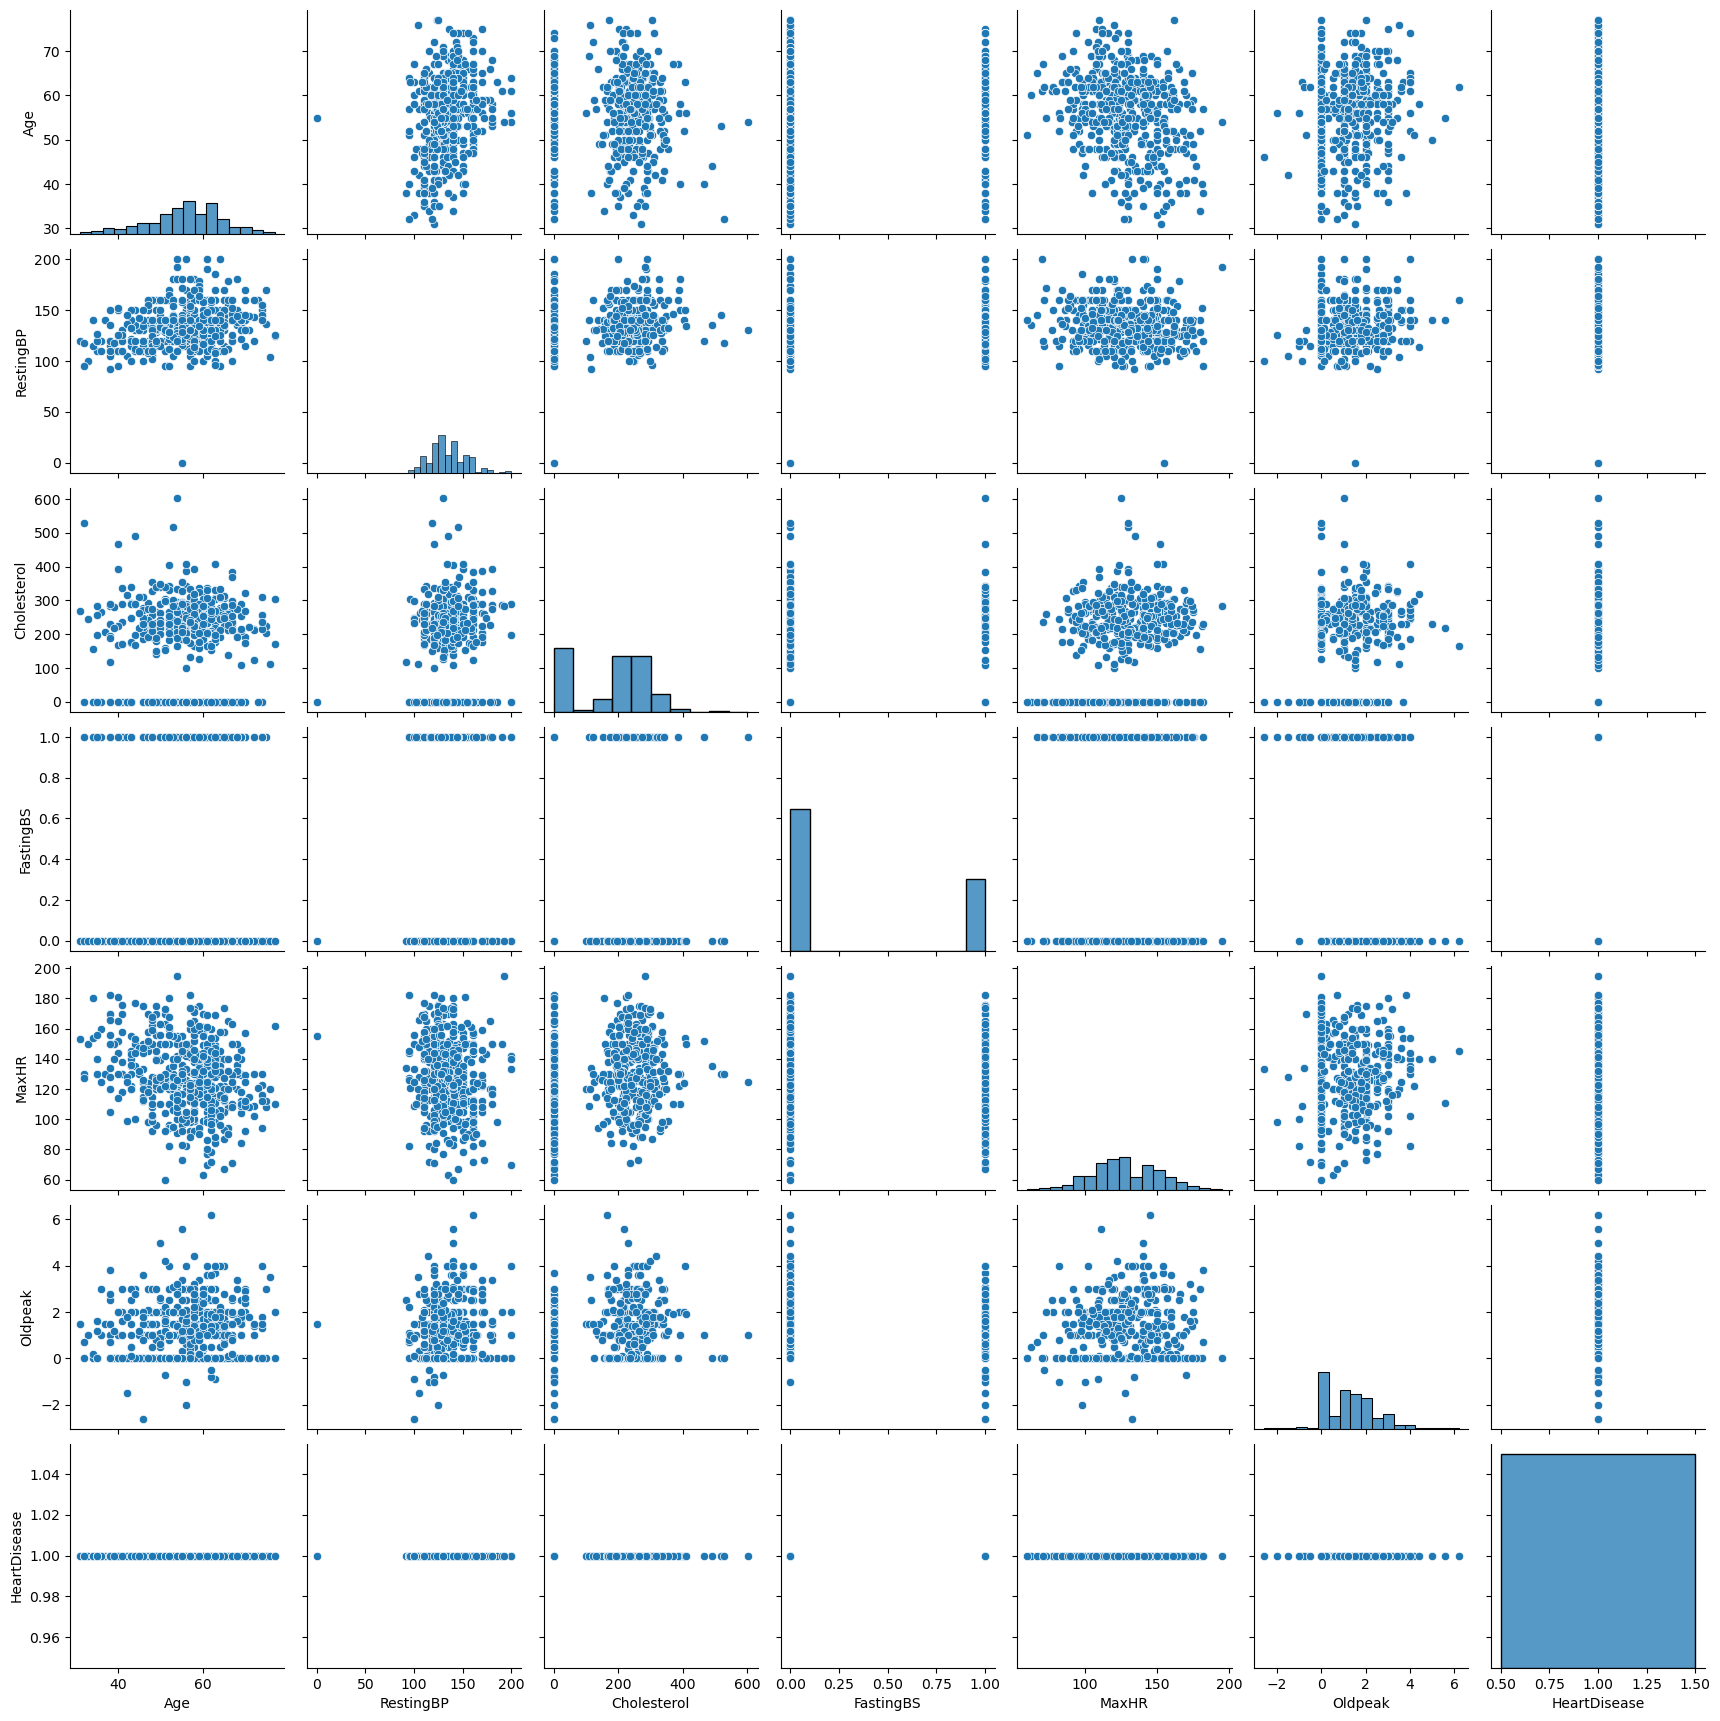

In [8]:
sns.pairplot(df[df['HeartDisease']==1])

In [9]:
df[df['HeartDisease']==0].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,410.000000,410.000000,410.000000,410.000000,410.000000,410.000000,410.0
mean,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049,0.0
std,9.444915,16.499585,74.634659,0.309894,23.288067,0.699709,0.0
min,28.000000,80.000000,0.000000,0.000000,69.000000,-1.100000,0.0
25%,43.000000,120.000000,197.250000,0.000000,134.000000,0.000000,0.0
50%,51.000000,130.000000,227.000000,0.000000,150.000000,0.000000,0.0
75%,57.000000,140.000000,266.750000,0.000000,165.000000,0.600000,0.0
max,76.000000,190.000000,564.000000,1.000000,202.000000,4.200000,0.0


In [10]:
df[df['HeartDisease']==1].describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,508.000000,508.000000,508.000000,508.000000,508.000000,508.000000,508.0
mean,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213,1.0
std,8.727056,19.828685,126.391398,0.472332,23.386923,1.151872,0.0
min,31.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,1.0
25%,51.000000,120.000000,0.000000,0.000000,112.000000,0.000000,1.0
50%,57.000000,132.000000,217.000000,0.000000,126.000000,1.200000,1.0
75%,62.000000,145.000000,267.000000,1.000000,144.250000,2.000000,1.0
max,77.000000,200.000000,603.000000,1.000000,195.000000,6.200000,1.0


-There is a big change in the Oldpeak mean and and std also median which may saied that when Oldpeak go high it tends that HeartDisease Happen 

<AxesSubplot:>

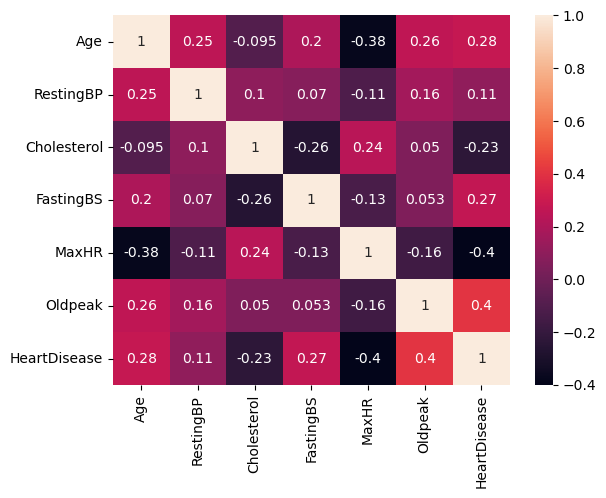

In [11]:
sns.heatmap(df.corr(),annot =True)

M    725
F    193
Name: Sex, dtype: int64


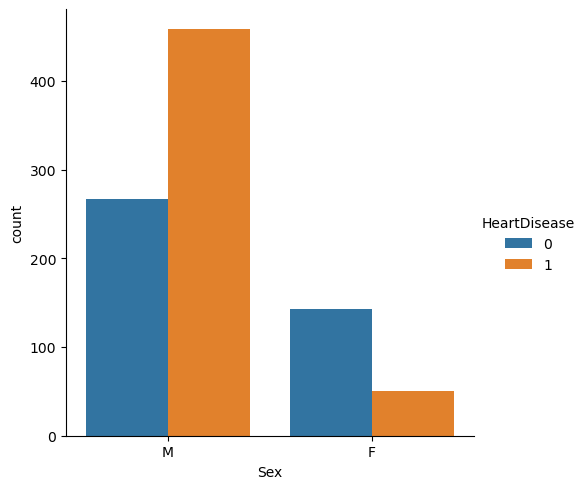

In [12]:
print(df['Sex'].value_counts())
sns.catplot(data=df, x="Sex", hue="HeartDisease", kind="count")

**I can Assume that males tend to get Heart Disease more than female**

HeartDisease     0    1
ChestPainType          
ASY            104  392
ATA            149   24
NAP            131   72
TA              26   20


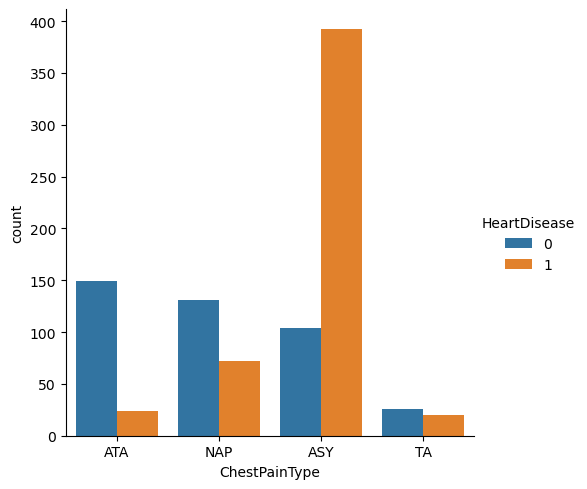

In [13]:
print(pd.crosstab(df["ChestPainType"],df["HeartDisease"]))
sns.catplot(data=df, x="ChestPainType", hue="HeartDisease", kind="count")

**I can assume that ASY Pain is high correlated to Heart Disease happen**

HeartDisease    0    1
RestingECG            
LVH            82  106
Normal        267  285
ST             61  117


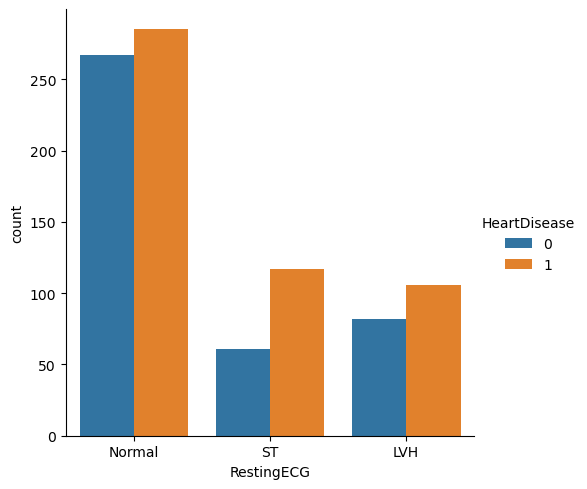

In [14]:
print(pd.crosstab(df["RestingECG"],df["HeartDisease"]))
sns.catplot(data=df, x="RestingECG", hue="HeartDisease", kind="count")

HeartDisease      0    1
ExerciseAngina          
N               355  192
Y                55  316


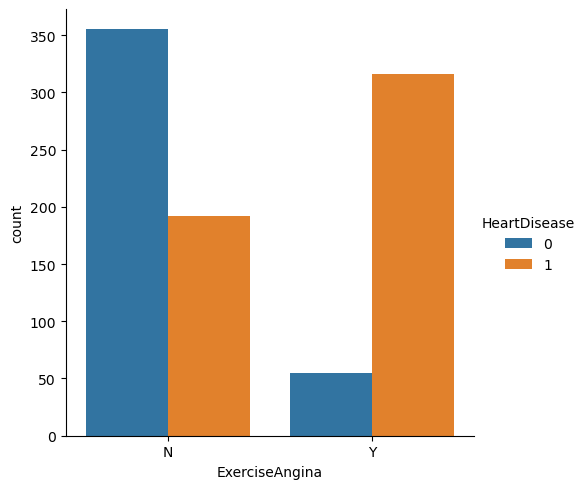

In [15]:
print(pd.crosstab(df["ExerciseAngina"],df["HeartDisease"]))
sns.catplot(data=df, x="ExerciseAngina", hue="HeartDisease", kind="count")

**we assume that ExerciseAngina affect the heartDisease**

HeartDisease    0    1
ST_Slope              
Down           14   49
Flat           79  381
Up            317   78


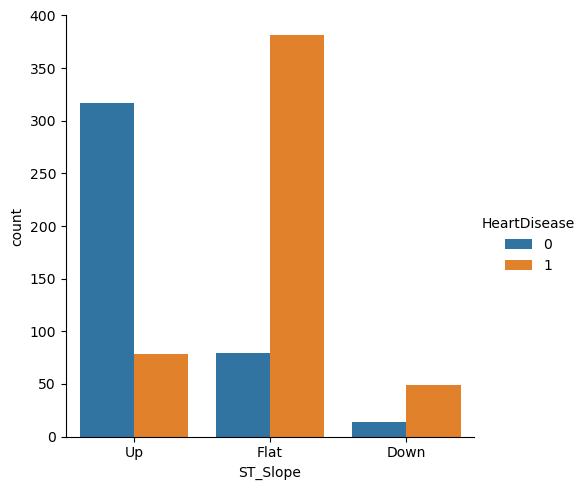

In [16]:
print(pd.crosstab(df["ST_Slope"],df["HeartDisease"]))
sns.catplot(data=df, x="ST_Slope", hue="HeartDisease", kind="count")

**we assume that ST_Slope Up and Falt affect the heartDisease**


In [17]:
X=pd.get_dummies(df.iloc[:,:-1],drop_first=True)
y=df.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.3)

In [19]:
X_train

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
98,56,120,85,0,140,0.0,1,0,0,0,1,0,0,0,1
133,56,150,230,0,124,1.5,1,0,0,0,0,1,1,1,0
128,54,120,230,1,140,0.0,0,1,0,0,1,0,0,0,1
515,63,130,0,1,160,3.0,1,0,1,0,0,1,0,1,0
749,54,150,232,0,165,1.6,1,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
801,56,132,184,0,105,2.1,1,0,0,0,0,0,1,1,0
487,57,140,214,0,144,2.0,1,0,0,0,0,1,1,1,0
141,50,140,341,0,125,2.5,1,0,0,0,0,1,1,1,0
48,36,112,340,0,184,1.0,1,0,1,0,1,0,0,1,0


In [20]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(penalty='l1', max_iter=5000, solver='saga')
lr.fit(X_train,y_train)
pred_lr =lr.predict(X_test)


In [21]:
from sklearn.metrics import confusion_matrix ,f1_score,accuracy_score,precision_score,recall_score
def metric(data1,data2):
    print("confusion_matrix :\n",confusion_matrix(data1,data2))
    print("f1_score :",f1_score(data1,data2))
    print("precision_score :",precision_score(data1,data2))
    print("recall_score :",recall_score(data1,data2))
    print("accuracy_score :",accuracy_score(data1,data2))
    

In [22]:
metric(y_test,pred_lr)

confusion_matrix :
 [[ 97  22]
 [ 21 136]]
f1_score : 0.8634920634920635
precision_score : 0.8607594936708861
recall_score : 0.8662420382165605
accuracy_score : 0.8442028985507246


In [23]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_scale=sc.fit_transform(X_train)
lr=LogisticRegression(penalty='l1', max_iter=5000, solver='saga',C=0.05)
lr.fit(X_scale,y_train)
pred_scal =lr.predict(sc.transform(X_test))
metric(y_test,pred_scal)

confusion_matrix :
 [[ 94  25]
 [ 15 142]]
f1_score : 0.8765432098765432
precision_score : 0.8502994011976048
recall_score : 0.9044585987261147
accuracy_score : 0.855072463768116


In [24]:
sc=StandardScaler()
X_scale=sc.fit_transform(X_train)
lr=LogisticRegression(penalty='l2', max_iter=5000, solver='saga',C=0.05)
lr.fit(X_scale,y_train)
pred_scal =lr.predict(sc.transform(X_test))
metric(y_test,pred_scal)

confusion_matrix :
 [[ 96  23]
 [ 17 140]]
f1_score : 0.8749999999999999
precision_score : 0.8588957055214724
recall_score : 0.89171974522293
accuracy_score : 0.855072463768116


In [25]:
from sklearn.preprocessing import PolynomialFeatures 
for i in range(1,3):
    sc=StandardScaler()
    X_scale=sc.fit_transform(X_train)
    pf=PolynomialFeatures(degree=i)
    X_poly =pf.fit_transform(X_scale)
    lr=LogisticRegression(penalty='l1', max_iter=5000, solver='saga')
    lr.fit(X_poly,y_train)
    pred_scal =lr.predict(pf.transform(sc.transform(X_test)))
    print(f"degree {i} :" )
    metric(y_test,pred_scal)
    print("__________________\n")

degree 1 :
confusion_matrix :
 [[ 96  23]
 [ 12 145]]
f1_score : 0.8923076923076922
precision_score : 0.8630952380952381
recall_score : 0.9235668789808917
accuracy_score : 0.8731884057971014
__________________

degree 2 :
confusion_matrix :
 [[ 93  26]
 [ 26 131]]
f1_score : 0.8343949044585988
precision_score : 0.8343949044585988
recall_score : 0.8343949044585988
accuracy_score : 0.8115942028985508
__________________



In [26]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)
pred_sv =sv.predict(X_test)
metric(y_test,pred_sv)

confusion_matrix :
 [[ 87  32]
 [ 41 116]]
f1_score : 0.7606557377049181
precision_score : 0.7837837837837838
recall_score : 0.7388535031847133
accuracy_score : 0.7355072463768116


In [27]:
sv=SVC()
sv.fit(X_scale,y_train)
pred_sv =sv.predict(sc.transform(X_test))
print("----------train data----------")
metric(y_train,sv.predict(sc.transform(X_train)))
print("----------test data----------")
metric(y_test,pred_sv)


----------train data----------
confusion_matrix :
 [[255  36]
 [ 23 328]]
f1_score : 0.9174825174825174
precision_score : 0.9010989010989011
recall_score : 0.9344729344729344
accuracy_score : 0.9080996884735203
----------test data----------
confusion_matrix :
 [[ 96  23]
 [ 11 146]]
f1_score : 0.8957055214723926
precision_score : 0.863905325443787
recall_score : 0.9299363057324841
accuracy_score : 0.8768115942028986


In [28]:
for i in range(2,6):
    print(f"------------ {i} degree ----------")
    sv=SVC(kernel='poly',degree =i)
    sv.fit(X_scale,y_train)
    pred_sv =sv.predict(sc.transform(X_test))
    print("----------train data----------")
    metric(y_train,sv.predict(sc.transform(X_train)))
    print("----------test data----------")
    metric(y_test,pred_sv)

------------ 2 degree ----------
----------train data----------
confusion_matrix :
 [[241  50]
 [ 38 313]]
f1_score : 0.8767507002801121
precision_score : 0.8622589531680441
recall_score : 0.8917378917378918
accuracy_score : 0.8629283489096573
----------test data----------
confusion_matrix :
 [[ 91  28]
 [ 28 129]]
f1_score : 0.821656050955414
precision_score : 0.821656050955414
recall_score : 0.821656050955414
accuracy_score : 0.7971014492753623
------------ 3 degree ----------
----------train data----------
confusion_matrix :
 [[263  28]
 [ 20 331]]
f1_score : 0.9323943661971832
precision_score : 0.9220055710306406
recall_score : 0.9430199430199431
accuracy_score : 0.9252336448598131
----------test data----------
confusion_matrix :
 [[ 96  23]
 [ 13 144]]
f1_score : 0.888888888888889
precision_score : 0.8622754491017964
recall_score : 0.9171974522292994
accuracy_score : 0.8695652173913043
------------ 4 degree ----------
----------train data----------
confusion_matrix :
 [[245  46]
 

In [29]:
sv=SVC(gamma=0.18)
sv.fit(X_scale,y_train)
pred_sv =sv.predict(sc.transform(X_test))
print("----------train data----------")
metric(y_train,sv.predict(sc.transform(X_train)))
print("----------test data----------")
metric(y_test,pred_sv)

----------train data----------
confusion_matrix :
 [[275  16]
 [ 12 339]]
f1_score : 0.9603399433427762
precision_score : 0.9549295774647887
recall_score : 0.9658119658119658
accuracy_score : 0.956386292834891
----------test data----------
confusion_matrix :
 [[ 93  26]
 [ 12 145]]
f1_score : 0.8841463414634145
precision_score : 0.847953216374269
recall_score : 0.9235668789808917
accuracy_score : 0.8623188405797102


In [30]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
print("----------train data----------")
metric(y_train,dt.predict(X_train))
print("----------test data----------")
metric(y_test,dt.predict(X_test))

----------train data----------
confusion_matrix :
 [[291   0]
 [  0 351]]
f1_score : 1.0
precision_score : 1.0
recall_score : 1.0
accuracy_score : 1.0
----------test data----------
confusion_matrix :
 [[ 90  29]
 [ 43 114]]
f1_score : 0.76
precision_score : 0.7972027972027972
recall_score : 0.7261146496815286
accuracy_score : 0.7391304347826086


In [31]:

dt=DecisionTreeClassifier(criterion='entropy')
dt.fit(X_train,y_train)
print("----------train data----------")
metric(y_train,dt.predict(X_train))
print("----------test data----------")
metric(y_test,dt.predict(X_test))

----------train data----------
confusion_matrix :
 [[291   0]
 [  0 351]]
f1_score : 1.0
precision_score : 1.0
recall_score : 1.0
accuracy_score : 1.0
----------test data----------
confusion_matrix :
 [[ 89  30]
 [ 26 131]]
f1_score : 0.8238993710691824
precision_score : 0.8136645962732919
recall_score : 0.8343949044585988
accuracy_score : 0.7971014492753623


In [32]:
for i in range(3,20):    
    print(f'\n------------ min sample split = {i}------------')
    dt=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=i)
    dt.fit(X_train,y_train)
#     print("----------train data----------")
#     metric(y_train,dt.predict(X_train))
    print("----------test data----------")
    metric(y_test,dt.predict(X_test))


------------ min sample split = 3------------
----------test data----------
confusion_matrix :
 [[ 93  26]
 [ 23 134]]
f1_score : 0.8454258675078865
precision_score : 0.8375
recall_score : 0.8535031847133758
accuracy_score : 0.822463768115942

------------ min sample split = 4------------
----------test data----------
confusion_matrix :
 [[ 92  27]
 [ 21 136]]
f1_score : 0.8500000000000001
precision_score : 0.8343558282208589
recall_score : 0.8662420382165605
accuracy_score : 0.8260869565217391

------------ min sample split = 5------------
----------test data----------
confusion_matrix :
 [[ 89  30]
 [ 22 135]]
f1_score : 0.8385093167701864
precision_score : 0.8181818181818182
recall_score : 0.8598726114649682
accuracy_score : 0.8115942028985508

------------ min sample split = 6------------
----------test data----------
confusion_matrix :
 [[ 92  27]
 [ 24 133]]
f1_score : 0.8391167192429022
precision_score : 0.83125
recall_score : 0.8471337579617835
accuracy_score : 0.8152173913043

In [33]:
for i in range(3,20):    
    print(f'\n------------ min sample split = {i}------------')
    dt=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=i,splitter='random')
    dt.fit(X_train,y_train)
#     print("----------train data----------")
#     metric(y_train,dt.predict(X_train))
    print("----------test data----------")
    metric(y_test,dt.predict(X_test))


------------ min sample split = 3------------
----------test data----------
confusion_matrix :
 [[ 95  24]
 [ 31 126]]
f1_score : 0.8208469055374592
precision_score : 0.84
recall_score : 0.802547770700637
accuracy_score : 0.8007246376811594

------------ min sample split = 4------------
----------test data----------
confusion_matrix :
 [[ 96  23]
 [ 22 135]]
f1_score : 0.8571428571428571
precision_score : 0.8544303797468354
recall_score : 0.8598726114649682
accuracy_score : 0.8369565217391305

------------ min sample split = 5------------
----------test data----------
confusion_matrix :
 [[ 95  24]
 [ 23 134]]
f1_score : 0.8507936507936509
precision_score : 0.8481012658227848
recall_score : 0.8535031847133758
accuracy_score : 0.8297101449275363

------------ min sample split = 6------------
----------test data----------
confusion_matrix :
 [[ 90  29]
 [ 16 141]]
f1_score : 0.8623853211009174
precision_score : 0.8294117647058824
recall_score : 0.8980891719745223
accuracy_score : 0.8369

the Decision tree with random splitter and min samole leaf 17 and criterion entropy is the best till now

In [34]:
dt=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=17,splitter='random',min_impurity_decrease=0.1)
dt.fit(X_train,y_train)
print("----------train data----------")
metric(y_train,dt.predict(X_train))
print("----------test data----------")
metric(y_test,dt.predict(X_test))

----------train data----------
confusion_matrix :
 [[228  63]
 [ 52 299]]
f1_score : 0.8387096774193549
precision_score : 0.8259668508287292
recall_score : 0.8518518518518519
accuracy_score : 0.8208722741433022
----------test data----------
confusion_matrix :
 [[ 89  30]
 [ 26 131]]
f1_score : 0.8238993710691824
precision_score : 0.8136645962732919
recall_score : 0.8343949044585988
accuracy_score : 0.7971014492753623


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
print("----------train data----------")
metric(y_train,rfc.predict(X_train))
print("----------test data----------")
metric(y_test,rfc.predict(X_test))


----------train data----------
confusion_matrix :
 [[291   0]
 [  0 351]]
f1_score : 1.0
precision_score : 1.0
recall_score : 1.0
accuracy_score : 1.0
----------test data----------
confusion_matrix :
 [[ 97  22]
 [ 12 145]]
f1_score : 0.8950617283950617
precision_score : 0.8682634730538922
recall_score : 0.9235668789808917
accuracy_score : 0.8768115942028986


In [36]:
for i in range(2,20):
    print(f'\n------------ min sample leaf = {i}------------')
    rfc = RandomForestClassifier(criterion='entropy',min_samples_leaf=i)
    rfc.fit(X_train,y_train)
    print("----------train data----------")
    metric(y_train,rfc.predict(X_train))
    print("----------test data----------")
    metric(y_test,rfc.predict(X_test))


------------ min sample leaf = 2------------
----------train data----------
confusion_matrix :
 [[269  22]
 [ 10 341]]
f1_score : 0.9551820728291317
precision_score : 0.9393939393939394
recall_score : 0.9715099715099715
accuracy_score : 0.9501557632398754
----------test data----------
confusion_matrix :
 [[ 95  24]
 [ 14 143]]
f1_score : 0.882716049382716
precision_score : 0.8562874251497006
recall_score : 0.910828025477707
accuracy_score : 0.8623188405797102

------------ min sample leaf = 3------------
----------train data----------
confusion_matrix :
 [[264  27]
 [ 16 335]]
f1_score : 0.9396914446002805
precision_score : 0.925414364640884
recall_score : 0.9544159544159544
accuracy_score : 0.9330218068535826
----------test data----------
confusion_matrix :
 [[ 94  25]
 [ 13 144]]
f1_score : 0.8834355828220859
precision_score : 0.8520710059171598
recall_score : 0.9171974522292994
accuracy_score : 0.8623188405797102

------------ min sample leaf = 4------------
----------train data---

In [37]:

for i in range(2,20):
    print(f'\n------------ min sample leaf = {i}------------')
    rfc = RandomForestClassifier(min_samples_leaf=i,bootstrap=False)
    rfc.fit(X_train,y_train)
    print("----------train data----------")
    metric(y_train,rfc.predict(X_train))
    print("----------test data----------")
    metric(y_test,rfc.predict(X_test))
    


------------ min sample leaf = 2------------
----------train data----------
confusion_matrix :
 [[288   3]
 [  0 351]]
f1_score : 0.9957446808510638
precision_score : 0.9915254237288136
recall_score : 1.0
accuracy_score : 0.9953271028037384
----------test data----------
confusion_matrix :
 [[ 98  21]
 [ 15 142]]
f1_score : 0.8875
precision_score : 0.8711656441717791
recall_score : 0.9044585987261147
accuracy_score : 0.8695652173913043

------------ min sample leaf = 3------------
----------train data----------
confusion_matrix :
 [[273  18]
 [  7 344]]
f1_score : 0.9649368863955119
precision_score : 0.9502762430939227
recall_score : 0.98005698005698
accuracy_score : 0.9610591900311527
----------test data----------
confusion_matrix :
 [[ 96  23]
 [ 14 143]]
f1_score : 0.8854489164086687
precision_score : 0.8614457831325302
recall_score : 0.910828025477707
accuracy_score : 0.8659420289855072

------------ min sample leaf = 4------------
----------train data----------
confusion_matrix :


**as we see from the confusion matrix the best model Random Forest Classifier where min_samples_leaf is 3,bootstrap is False**

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

rfc1 = RandomForestClassifier(min_samples_leaf=3,bootstrap=False)
dt1=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=17,splitter='random')

parameters = {'base_estimator':[rfc1, dt1],
             'n_estimators':[10,50,100]}
abc = AdaBoostClassifier()
print(abc.get_params().keys())
clf = GridSearchCV(estimator=abc, param_grid=parameters,return_train_score=True)
clf.fit(X_train, y_train)
res_df =pd.DataFrame(clf.cv_results_)
res_df.sort_values(by=['rank_test_score'],ascending=True)


dict_keys(['algorithm', 'base_estimator', 'learning_rate', 'n_estimators', 'random_state'])


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
1,0.435489,0.012114,0.033255,0.001331,"RandomForestClassifier(bootstrap=False, min_sa...",50,{'base_estimator': RandomForestClassifier(boot...,0.883721,0.806202,0.867188,...,0.875484,0.044301,1,1.00000,1.000000,1.00000,1.000000,0.998054,0.999611,0.000778
2,0.436365,0.016395,0.033700,0.001669,"RandomForestClassifier(bootstrap=False, min_sa...",100,{'base_estimator': RandomForestClassifier(boot...,0.891473,0.798450,0.859375,...,0.872359,0.047635,2,1.00000,1.000000,1.00000,1.000000,0.998054,0.999611,0.000778
0,0.432972,0.003226,0.033537,0.002076,"RandomForestClassifier(bootstrap=False, min_sa...",10,{'base_estimator': RandomForestClassifier(boot...,0.883721,0.782946,0.859375,...,0.867708,0.052025,3,1.00000,1.000000,1.00000,1.000000,0.998054,0.999611,0.000778
5,0.254573,0.008950,0.022576,0.000815,"DecisionTreeClassifier(criterion='entropy', mi...",100,{'base_estimator': DecisionTreeClassifier(crit...,0.875969,0.821705,0.875000,...,0.862972,0.024130,4,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
4,0.133475,0.010926,0.013272,0.001044,"DecisionTreeClassifier(criterion='entropy', mi...",50,{'base_estimator': DecisionTreeClassifier(crit...,0.868217,0.775194,0.812500,...,0.830245,0.033670,5,1.00000,1.000000,1.00000,1.000000,1.000000,1.000000,0.000000
3,0.032179,0.002509,0.005171,0.000257,"DecisionTreeClassifier(criterion='entropy', mi...",10,{'base_estimator': DecisionTreeClassifier(crit...,0.891473,0.798450,0.820312,...,0.830172,0.046983,6,0.97271,0.996101,0.98249,0.978599,0.964981,0.978976,0.010401


In [39]:
print("----------train data----------")
metric(y_train,clf.predict(X_train))
print("----------test data----------")
metric(y_test,clf.predict(X_test))



----------train data----------
confusion_matrix :
 [[290   1]
 [  0 351]]
f1_score : 0.9985775248933144
precision_score : 0.9971590909090909
recall_score : 1.0
accuracy_score : 0.9984423676012462
----------test data----------
confusion_matrix :
 [[ 96  23]
 [ 11 146]]
f1_score : 0.8957055214723926
precision_score : 0.863905325443787
recall_score : 0.9299363057324841
accuracy_score : 0.8768115942028986


In [40]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {'min_samples_split':range(2,20),
             'n_estimators':[10,50,100]}

gbc = GradientBoostingClassifier()
clf = GridSearchCV(estimator=gbc, param_grid=parameters,return_train_score=True)
clf.fit(X_train, y_train)
res_df =pd.DataFrame(clf.cv_results_)
res_df.sort_values(by=['rank_test_score'],ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
19,0.071047,0.002552,0.003208,0.000288,8,50,"{'min_samples_split': 8, 'n_estimators': 50}",0.883721,0.790698,0.875000,...,0.869259,0.044877,1,0.927875,0.941520,0.924125,0.931907,0.922179,0.929521,0.006862
53,0.139104,0.003220,0.003250,0.000085,19,100,"{'min_samples_split': 19, 'n_estimators': 100}",0.883721,0.806202,0.882812,...,0.869234,0.035984,2,0.957115,0.972710,0.953307,0.951362,0.963035,0.959506,0.007710
50,0.136677,0.001440,0.003194,0.000142,18,100,"{'min_samples_split': 18, 'n_estimators': 100}",0.883721,0.806202,0.882812,...,0.869234,0.035984,2,0.957115,0.968811,0.953307,0.951362,0.955253,0.957170,0.006129
14,0.133692,0.001790,0.003076,0.000099,6,100,"{'min_samples_split': 6, 'n_estimators': 100}",0.883721,0.806202,0.882812,...,0.869234,0.035984,2,0.953216,0.974659,0.953307,0.955253,0.959144,0.959116,0.008063
4,0.073213,0.002913,0.003067,0.000256,3,50,"{'min_samples_split': 3, 'n_estimators': 50}",0.883721,0.782946,0.875000,...,0.867708,0.047615,5,0.927875,0.947368,0.929961,0.933852,0.922179,0.932247,0.008449
25,0.070087,0.001265,0.002896,0.000024,10,50,"{'min_samples_split': 10, 'n_estimators': 50}",0.883721,0.782946,0.875000,...,0.867708,0.047615,5,0.929825,0.943470,0.924125,0.931907,0.922179,0.930301,0.007488
31,0.070718,0.001699,0.002918,0.000041,12,50,"{'min_samples_split': 12, 'n_estimators': 50}",0.883721,0.782946,0.875000,...,0.867708,0.047615,5,0.931774,0.943470,0.924125,0.931907,0.922179,0.930691,0.007504
22,0.069312,0.001691,0.002865,0.000024,9,50,"{'min_samples_split': 9, 'n_estimators': 50}",0.883721,0.782946,0.875000,...,0.867708,0.047615,5,0.927875,0.943470,0.924125,0.931907,0.922179,0.929911,0.007553
1,0.069656,0.000567,0.002885,0.000032,2,50,"{'min_samples_split': 2, 'n_estimators': 50}",0.883721,0.782946,0.875000,...,0.867708,0.047615,5,0.927875,0.947368,0.929961,0.933852,0.924125,0.932636,0.008010
28,0.069773,0.001397,0.003010,0.000184,11,50,"{'min_samples_split': 11, 'n_estimators': 50}",0.883721,0.782946,0.875000,...,0.867708,0.047615,5,0.931774,0.943470,0.924125,0.931907,0.922179,0.930691,0.007504


In [41]:
print("----------train data----------")
metric(y_train,clf.predict(X_train))
print("----------test data----------")
metric(y_test,clf.predict(X_test))

----------train data----------
confusion_matrix :
 [[264  27]
 [ 23 328]]
f1_score : 0.9291784702549575
precision_score : 0.923943661971831
recall_score : 0.9344729344729344
accuracy_score : 0.9221183800623053
----------test data----------
confusion_matrix :
 [[ 99  20]
 [ 14 143]]
f1_score : 0.89375
precision_score : 0.8773006134969326
recall_score : 0.910828025477707
accuracy_score : 0.8768115942028986


In [42]:
import xgboost as xgb
cl_xgb=xgb.XGBClassifier()
cl_xgb.fit(X_train,y_train,verbose=True,early_stopping_rounds=10,eval_metric='aucpr'
           ,eval_set=[(X_test,y_test)])
print("----------train data----------")
metric(y_train,cl_xgb.predict(X_train))
print("----------test data----------")
metric(y_test,cl_xgb.predict(X_test))

[0]	validation_0-aucpr:0.89172
[1]	validation_0-aucpr:0.90159
[2]	validation_0-aucpr:0.90522
[3]	validation_0-aucpr:0.89543
[4]	validation_0-aucpr:0.89791
[5]	validation_0-aucpr:0.91845
[6]	validation_0-aucpr:0.91450
[7]	validation_0-aucpr:0.91035
[8]	validation_0-aucpr:0.91199
[9]	validation_0-aucpr:0.92068
[10]	validation_0-aucpr:0.92687
[11]	validation_0-aucpr:0.92903
[12]	validation_0-aucpr:0.93063
[13]	validation_0-aucpr:0.93346
[14]	validation_0-aucpr:0.93235
[15]	validation_0-aucpr:0.93562
[16]	validation_0-aucpr:0.93685


/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  UserWarning,
/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:797: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  UserWarning,


[17]	validation_0-aucpr:0.93818
[18]	validation_0-aucpr:0.93780
[19]	validation_0-aucpr:0.93711
[20]	validation_0-aucpr:0.93772
[21]	validation_0-aucpr:0.93723
[22]	validation_0-aucpr:0.93680
[23]	validation_0-aucpr:0.93610
[24]	validation_0-aucpr:0.93633
[25]	validation_0-aucpr:0.93732
[26]	validation_0-aucpr:0.93735
[27]	validation_0-aucpr:0.93801
----------train data----------
confusion_matrix :
 [[282   9]
 [  2 349]]
f1_score : 0.9844851904090267
precision_score : 0.9748603351955307
recall_score : 0.9943019943019943
accuracy_score : 0.9828660436137072
----------test data----------
confusion_matrix :
 [[ 97  22]
 [ 20 137]]
f1_score : 0.8670886075949368
precision_score : 0.8616352201257862
recall_score : 0.8726114649681529
accuracy_score : 0.8478260869565217
